In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import gridspec
from waterbirds import data_builder as wb
from dr import data_builder as db

In [9]:
data_dir = '/nfs/turbo/coe-soto/mmakar/multiple_shortcut/waterbirds/'
_, train_input_fn, _, _, _ = wb.build_input_fns(data_dir, weighted='False', p_tr=.7, p_val = 0.25,
 v_dim=2, clean_back='True', random_seed=0, alg_step='None')

params = {
    'weighted': 'False', 
    'pixel': 128, 
    'num_epochs': 1, 
    'batch_size': 64
}

In [10]:
tr_data = train_input_fn(params)


In [11]:
img_list = []
label_list = []
x, labels = next(iter(tr_data))
labels = labels['labels']

In [12]:
# for x_i in x:
#     plt.imshow(x_i)
#     plt.show()
#     plt.clf()

In [13]:
image_raw = tf.io.read_file(('/nfs/turbo/coe-soto/CUB_200_2011/'
                'images/059.California_Gull/'
                'California_Gull_0001_40786.jpg'))
image = tf.image.decode_image(image_raw)

mask_raw = tf.io.read_file(('/nfs/turbo/coe-soto/'
                'segmentations/059.California_Gull/'
                'California_Gull_0001_40786.png'))
mask = tf.image.decode_image(mask_raw)
mask = tf.math.round(mask/255)


background_raw = tf.io.read_file(('/nfs/turbo/coe-soto/places_data/land/'
                                  'image_10.jpg'))
land_back_image = tf.image.decode_image(background_raw)


background_raw = tf.io.read_file(('/nfs/turbo/coe-soto/places_data/water/'
                                  'image_0.jpg'))
water_back_image = tf.image.decode_image(background_raw)


# get binary noise
noise_raw = tf.io.read_file(('/nfs/turbo/coe-soto/mmakar/'
                'multiple_shortcut/waterbirds/experiment_data/'
                'rs0/noise_imgs/train_valid/Least_Auklet_0004_795112.png'))
noise_image = tf.image.decode_image(noise_raw)



    

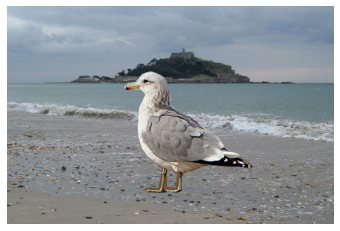

In [14]:
# ------ water bird on water background ------ #
background_image = water_back_image
bkgrd_resized = tf.image.resize(background_image, (image.shape[0], image.shape[1]))
bkgrd_resized = tf.cast(bkgrd_resized, tf.uint8)
final_wb_wb = image* tf.cast(mask, tf.uint8) + bkgrd_resized * tf.cast(1 - mask, tf.uint8)
plt.imshow(final_wb_wb)
plt.axis('off')
plt.savefig("/nfs/turbo/coe-soto/mmakar/multiple_shortcut/waterbirds/images/waterbird_on_waterback.pdf", bbox_inches='tight')


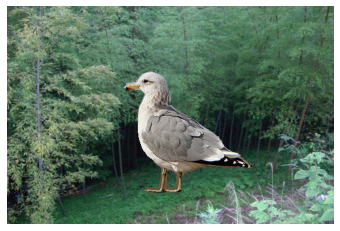

In [15]:
# ------ water bird on land background ------ #
background_image = land_back_image
bkgrd_resized = tf.image.resize(background_image, (image.shape[0], image.shape[1]))
bkgrd_resized = tf.cast(bkgrd_resized, tf.uint8)
final_wb_lb = image* tf.cast(mask, tf.uint8) + bkgrd_resized * tf.cast(1 - mask, tf.uint8)
plt.imshow(final_wb_lb)
plt.axis('off')
plt.savefig("/nfs/turbo/coe-soto/mmakar/multiple_shortcut/waterbirds/images/waterbird_on_landback.pdf", bbox_inches='tight')


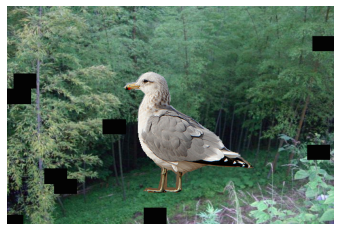

In [16]:
# ------ water bird on land background, corrupted ------ #
background_image = land_back_image
bkgrd_resized = tf.image.resize(background_image, (image.shape[0], image.shape[1]))
bkgrd_resized = tf.cast(bkgrd_resized, tf.uint8)
final = image* tf.cast(mask, tf.uint8) + bkgrd_resized * tf.cast(1 - mask, tf.uint8)

noise_image = tf.image.resize(noise_image, (final.shape[0], final.shape[1]))
noise_image = tf.squeeze(noise_image)
noise_image = tf.cast(tf.stack([noise_image] * 3, axis = 2), tf.uint8)
final_wb_lb_c = (1 - noise_image) * final + noise_image * 3
plt.imshow(final_wb_lb_c)
plt.axis('off')
plt.savefig("/nfs/turbo/coe-soto/mmakar/multiple_shortcut/waterbirds/images/waterbird_on_landback_corrupt.pdf", bbox_inches='tight')


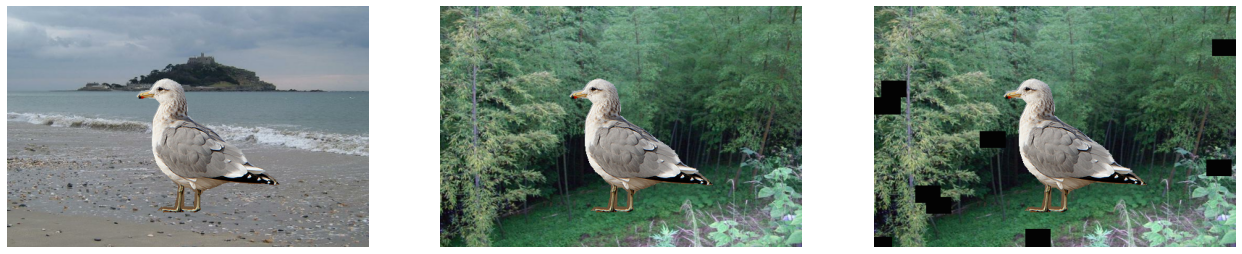

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
axes[0].imshow(final_wb_wb)
axes[0].axis('off')

axes[1].imshow(final_wb_lb)
axes[1].axis('off')

axes[2].imshow(final_wb_lb_c)
axes[2].axis('off')
plt.savefig("/nfs/turbo/coe-soto/mmakar/multiple_shortcut/waterbirds/images/waterbirds_all.pdf", bbox_inches='tight')



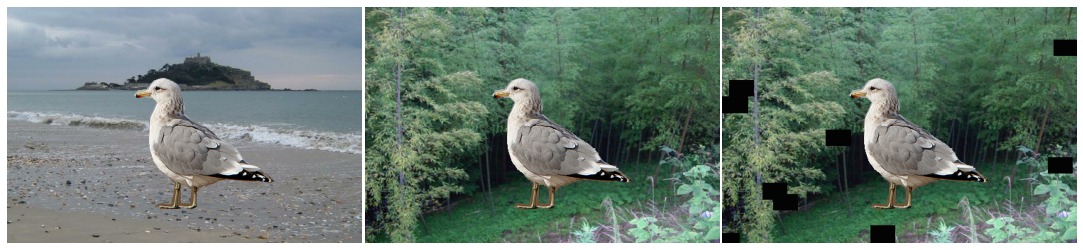

In [23]:
fig = plt.figure(figsize=(22, 8)) 

gs = gridspec.GridSpec(1, 3, 
         wspace=0.01, hspace=0.04, top=5, bottom=4, left=0.17, right=0.845)
ax= plt.subplot(gs[0])
ax.imshow(final_wb_wb)
ax.axis('off')

ax= plt.subplot(gs[1])
ax.imshow(final_wb_lb)
ax.axis('off')

ax= plt.subplot(gs[2])
ax.imshow(final_wb_lb_c)
ax.axis('off')

plt.savefig(
    "/nfs/turbo/coe-soto/mmakar/multiple_shortcut/waterbirds/images/waterbirds_all_wide.pdf", bbox_inches='tight')

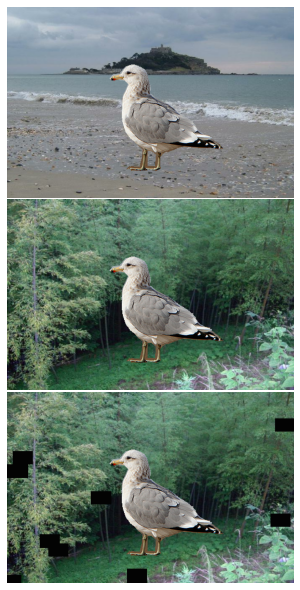

In [40]:
fig = plt.figure(figsize=(22, 8)) 

gs = gridspec.GridSpec(3, 1, 
         wspace=0.5, hspace=0.01, top=5, bottom=4, left=0.17, right=0.845) 

ax= plt.subplot(gs[0,0])
ax.imshow(final_wb_wb)
ax.axis('off')

ax= plt.subplot(gs[1,0])
ax.imshow(final_wb_lb)
ax.axis('off')

ax= plt.subplot(gs[2,0])
ax.imshow(final_wb_lb_c)
ax.axis('off')

plt.savefig("/nfs/turbo/coe-soto/mmakar/multiple_shortcut/waterbirds/images/waterbirds_all_long.pdf", bbox_inches='tight')